## Healpy_station

In de module Healpy_station ....

In [1]:
import numpy as np
from astropy_healpix import healpy as hp
import matplotlib.pyplot as plt
import sapphire.transformations.celestial as cl
%matplotlib inline

cmap = plt.get_cmap('gray')
cmap.set_under('w')

In [2]:
def station_to_sky(azimuth_station, zen_par, zen_per):
    zenith = np.arccos(np.cos(zen_par) * np.cos(zen_per))
    try:
        azimuth = np.arccos(np.sin(zen_par) / np.sin(zenith)) + azimuth_station
    except:
        azimuth = 0.
    return zenith, azimuth

In [3]:
zenith, azimuth = station_to_sky(np.radians(0), np.radians(0.001), np.radians(0.))
np.degrees(zenith), np.degrees(azimuth)

(0.0010000000370998989, 0.015607163727576472)

In [4]:
def sky_to_station(azimuth_station, zenith, azimuth):
    sin_zenith = np.sin(zenith)
    cos_zenith = np.cos(zenith)
    cos_azimuth = np.cos(azimuth - azimuth_station)
    zenith_par = np.arcsin(sin_zenith * cos_azimuth)
    try:
        zenith_per = np.arccos(cos_zenith / ((1.000000000000001 - (sin_zenith * cos_azimuth) ** 2) ** .5))
    except:
        zenith_per = 0.
    return zenith_par, zenith_per

In [5]:
sky_to_station(np.radians(60.), np.radians(30.), np.radians(60.))

(0.52359877559829882, 3.6500241499888574e-08)

In [6]:
azimuths = np.arange(0., np.pi / 2, np.pi / 180)

In [7]:
zeniths_par, zeniths_per = sky_to_station(0, np.radians(30), azimuths)

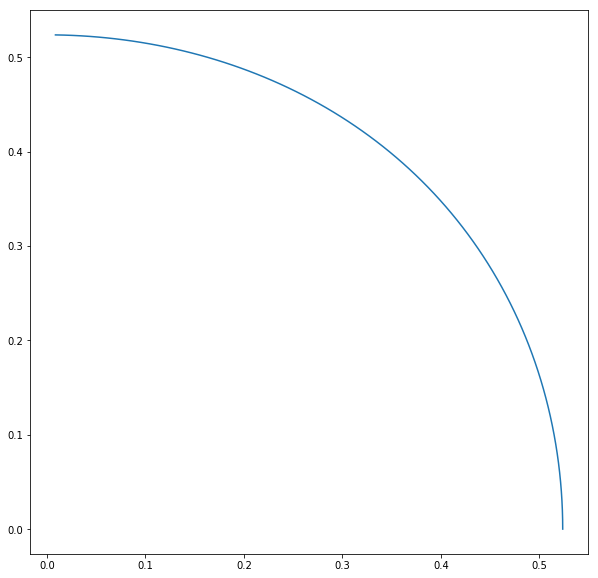

In [8]:
plt.figure(figsize=(10,10))
plt.plot(zeniths_par, zeniths_per)

In [9]:
c = 299792458
d = 10
longitude = .0
latitude = .0
timestamp = -24110.54841

N = 500
NSIDE = 16 #nside determines the size of the pixels

azimuth = np.random.random(N) * 2 * np.pi
zen = np.random.random(N)
zenith = np.arccos(zen ** .125)

In [10]:
from sapphire.utils import pbar

In [12]:
RA = []
DEC = []
for i in range(0, N):
    ra, dec = cl.zenithazimuth_to_equatorial(longitude, latitude, timestamp,
                                             zenith[i], azimuth[i])
    RA.append(ra)
    DEC.append(np.pi / 2 - dec)

pixels = hp.ang2pix(NSIDE, DEC, RA)
#NOTE healpy uses colatitude (north pole 0) instead of latitude
hitmap = np.ones(hp.nside2npix(NSIDE))# * hp.UNSEEN
#by convention non hit pixels have a specific value
pixels_binned = np.bincount(pixels)
hitmap[:len(pixels_binned)] = pixels_binned
hp.orthview(hitmap, xsize=2000, half_sky=True, cmap=cmap, title="Scintillator")
plt.show()

AttributeError: module 'astropy_healpix.healpy' has no attribute 'orthview'

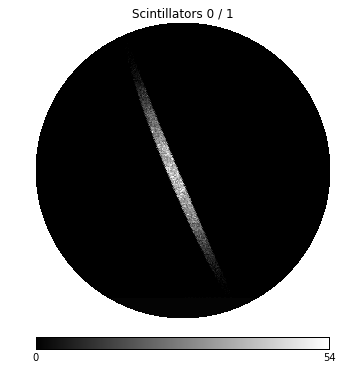

In [11]:
RA = []
DEC = []
t = 2.5
dl = (t + 1.25) * c * (10 ** -9)
tanTmax = np.tan(np.arcsin(dl / d))
dl = (t - 1.25) * c * (10 ** -9)
tanTmin = np.tan(np.arcsin(dl / d))
rotation = np.pi / 8

for i in range(0, N):
    if (np.cos(azimuth[i] + rotation) * np.tan(zenith[i]) < tanTmax):
        if (np.cos(azimuth[i] + rotation) * np.tan(zenith[i]) > tanTmin):
            ra, dec = cl.zenithazimuth_to_equatorial(longitude, latitude, timestamp,
                                                     zenith[i], azimuth[i])
            RA.append(ra)
            DEC.append(np.pi / 2 - dec)

pixels = hp.ang2pix(NSIDE, DEC, RA)
#NOTE healpy uses colatitude (north pole 0) instead of latitude
hitmap = np.ones(hp.nside2npix(NSIDE))# * hp.UNSEEN
#by convention non hit pixels have a specific value
pixels_binned = np.bincount(pixels)
hitmap[:len(pixels_binned)] = pixels_binned
hp.orthview(hitmap, xsize=2000, half_sky=True, cmap=cmap, title="Scintillators 0 / 1")
plt.show()

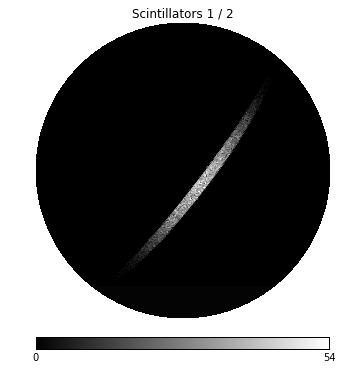

In [12]:
RA = []
DEC = []
t = 5.
dl = (t + 1.25) * c * (10 ** -9)
tanTmax = np.tan(np.arcsin(dl / d))
dl = (t - 1.25) * c * (10 ** -9)
tanTmin = np.tan(np.arcsin(dl / d))
rotation = np.pi / 8 + 2 * np.pi / 3

for i in range(0, N):
    if (np.cos(azimuth[i] + rotation) * np.tan(zenith[i]) < tanTmax):
        if (np.cos(azimuth[i] + rotation) * np.tan(zenith[i]) > tanTmin):
            ra, dec = cl.zenithazimuth_to_equatorial(longitude, latitude, timestamp,
                                                     zenith[i], azimuth[i])
            RA.append(ra)
            DEC.append(np.pi / 2 - dec)

pixels = hp.ang2pix(NSIDE, DEC, RA)
#NOTE healpy uses colatitude (north pole 0) instead of latitude
hitmap = np.ones(hp.nside2npix(NSIDE))# * hp.UNSEEN
#by convention non hit pixels have a specific value
pixels_binned = np.bincount(pixels)
hitmap[:len(pixels_binned)] = pixels_binned
hp.orthview(hitmap, xsize=2000, half_sky=True, cmap=cmap, title="Scintillators 1 / 2")
plt.show()

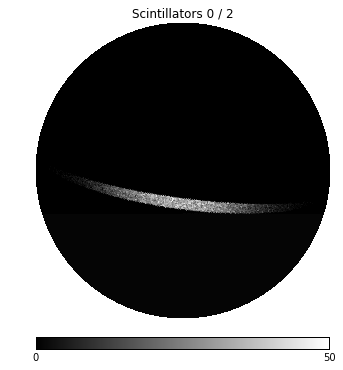

In [13]:
RA = []
DEC = []
t = -7.5
dl = (t + 1.25) * c * (10 ** -9)
tanTmax = np.tan(np.arcsin(dl / d))
dl = (t - 1.25) * c * (10 ** -9)
tanTmin = np.tan(np.arcsin(dl / d))
rotation = np.pi / 8 + 4 * np.pi / 3

for i in range(0, N):
    if (np.cos(azimuth[i] + rotation) * np.tan(zenith[i]) < tanTmax):
        if (np.cos(azimuth[i] + rotation) * np.tan(zenith[i]) > tanTmin):
            ra, dec = cl.zenithazimuth_to_equatorial(longitude, latitude, timestamp,
                                                     zenith[i], azimuth[i])
            RA.append(ra)
            DEC.append(np.pi / 2 - dec)

pixels = hp.ang2pix(NSIDE, DEC, RA)
#NOTE healpy uses colatitude (north pole 0) instead of latitude
hitmap = np.ones(hp.nside2npix(NSIDE))# * hp.UNSEEN
#by convention non hit pixels have a specific value
pixels_binned = np.bincount(pixels)
hitmap[:len(pixels_binned)] = pixels_binned
hp.orthview(hitmap, xsize=2000, half_sky=True, cmap=cmap, title="Scintillators 0 / 2")
plt.show()

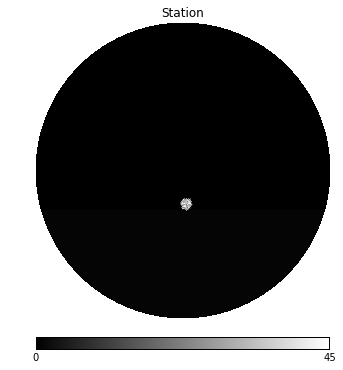

In [14]:
RA = []
DEC = []
t = 2.5
dl = (t + 1.25) * c * (10 ** -9)
tanTmax1 = np.tan(np.arcsin(dl / d))
dl = (t - 1.25) * c * (10 ** -9)
tanTmin1 = np.tan(np.arcsin(dl / d))
rotation1 = np.pi / 8 + 0 * np.pi / 3
t = 5.
dl = (t + 1.25) * c * (10 ** -9)
tanTmax2 = np.tan(np.arcsin(dl / d))
dl = (t - 1.25) * c * (10 ** -9)
tanTmin2 = np.tan(np.arcsin(dl / d))
rotation2 = np.pi / 8 + 2 * np.pi / 3
t = -7.5
dl = (t + 1.25) * c * (10 ** -9)
tanTmax3 = np.tan(np.arcsin(dl / d))
dl = (t - 1.25) * c * (10 ** -9)
tanTmin3 = np.tan(np.arcsin(dl / d))
rotation3 = np.pi / 8 + 4 * np.pi / 3

for i in range(0, N):
    if (np.cos(azimuth[i] + rotation1) * np.tan(zenith[i]) < tanTmax1):
        if (np.cos(azimuth[i] + rotation1) * np.tan(zenith[i]) > tanTmin1):
            if (np.cos(azimuth[i] + rotation2) * np.tan(zenith[i]) < tanTmax2):
                if (np.cos(azimuth[i] + rotation2) * np.tan(zenith[i]) > tanTmin2):
                    if (np.cos(azimuth[i] + rotation3) * np.tan(zenith[i]) < tanTmax3):
                        if (np.cos(azimuth[i] + rotation3) * np.tan(zenith[i]) > tanTmin3):
                            ra, dec = cl.zenithazimuth_to_equatorial(longitude, latitude, timestamp,
                                                                     zenith[i], azimuth[i])
                            RA.append(ra)
                            DEC.append(np.pi / 2 - dec)

pixels = hp.ang2pix(NSIDE, DEC, RA)
#NOTE healpy uses colatitude (north pole 0) instead of latitude
hitmap = np.ones(hp.nside2npix(NSIDE))# * hp.UNSEEN
#by convention non hit pixels have a specific value
pixels_binned = np.bincount(pixels)
hitmap[:len(pixels_binned)] = pixels_binned
hp.orthview(hitmap, xsize=2000, half_sky=True, cmap=cmap, title="Station")

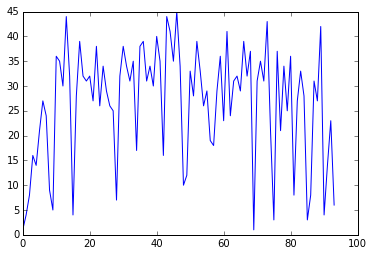

In [15]:
pixels = []
for pixel_binned in pixels_binned:
    if pixel_binned > 0:
        pixels.append(pixel_binned)
plt.plot(pixels)

In [ ]:
hp.ang2pix?